### Sentence Segmentation

### Ref: https://www.nltk.org/book/ch07.html

### Ref: https://gist.github.com/alexbowe/879414

### Problem Statement : Extract nouns, Verbs,  Noun Phrases and Verb Phrases

In [14]:
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet

from IPython.display import display
lemmatizer = nltk.WordNetLemmatizer()

In [15]:
document = 'The little brown dog barked at the black cat'
document

'The little brown dog barked at the black cat'

In [16]:
tokens = [nltk.word_tokenize(sent) for sent in [document]]
tokens

[['The', 'little', 'brown', 'dog', 'barked', 'at', 'the', 'black', 'cat']]

### POS Tagging

In [17]:
postag = [nltk.pos_tag(sent) for sent in tokens][0]
postag

[('The', 'DT'),
 ('little', 'JJ'),
 ('brown', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('black', 'JJ'),
 ('cat', 'NN')]

In [18]:
pos_tag([document])

[('The little brown dog barked at the black cat', 'NN')]

In [19]:
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        {<RB.?>*<VB.?>*<JJ>*<VB.?>+<VB>?} # Verbs and Verb Phrases
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
        
"""

cp = nltk.RegexpParser(grammar)
tree = cp.parse(postag)
print(tree)

(S
  The/DT
  (NP (NBAR little/JJ brown/JJ dog/NN))
  (NP (NBAR barked/VBD))
  at/IN
  the/DT
  (NP (NBAR black/JJ cat/NN)))


In [20]:
tree.draw()

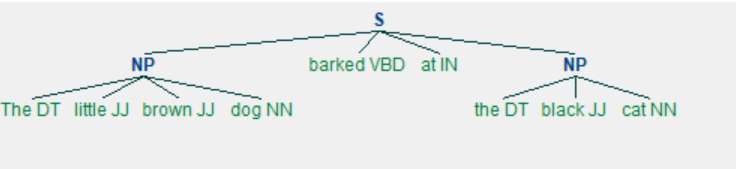

In [21]:
from PIL import Image               # to load images
from IPython.display import display # to display images

pil_im = Image.open('2.png')
display(pil_im)

In [22]:
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label() =='NP'):
        yield subtree.leaves()
        
def get_word_postag(word):
    if pos_tag([word])[0][1].startswith('J'):
        return wordnet.ADJ
    if pos_tag([word])[0][1].startswith('V'):
        return wordnet.VERB
    if pos_tag([word])[0][1].startswith('N'):
        return wordnet.NOUN
    else:
        return wordnet.NOUN
    
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    postag = get_word_postag(word)
    word = lemmatizer.lemmatize(word,postag)
    return word

def get_terms(tree):    
    for leaf in leaves(tree):
        terms = [normalise(w) for w,t in leaf]
        yield terms

terms = get_terms(tree)

features = []
for term in terms:
    _term = ''
    for word in term:
        _term += ' ' + word
    features.append(_term.strip())
features

['little brown dog', 'bark', 'black cat']